## Main figures

## Figure 7: Plots of the Mean Seasonal Cycle (MSC) of the first principal component by biotic units (bu)

### Estupinan-Suarez, et al. (2021). A Regional Earth System Data Lab for Understanding Ecosystem Dynamics: An Example from Tropical South America. Front. Earth Sci. 9:613395. doi: 10.3389/feart.2021.613395
#### Correspondence to: lestup@bgc-jena.mpg.de, linamaesu@gmail.com
#### GitHub repository: https://github.com/linamaes/Regional_ESDL


Steps:
- Load computed MSC (mean and std) for 1st PCA component
- Load ratio annual and semiannual ocsillation cube by bu
- Load percentage of variance explained by bu
- Plots MSC by biotic units. It corresponds to Figure 7A to 7D 


About the notebook:
- It is written in Julia 1.3
- "#" comments in the code are intended to explain specific aspects of the coding
- New steps in workflows are introduced with bold headers

April 2021, Max Planck Insitute for Biogeochemistry, Jena, Germany

## Load packages

In [1]:
using OnlineStats

In [2]:
using ESDL

In [3]:
using CSV

In [4]:
using Dates

In [5]:
using NPZ

In [6]:
using NetCDF

In [7]:
using Plots

In [8]:
using ESDLPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-5883805086551239848\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-15428586411460933949\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-5883805086551239848\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [9]:
using DelimitedFiles

In [10]:
gr(size=(600,400))
default(fmt = :png)

### Root

In [11]:
pathin = "/my_path_in/.../"

"/path_in/.../"

## Load PCA 1st component (vegetation variables)

## Load cubes

In [13]:
percannsem = loadCube("fraction_biome_pca1km2014_mask")

ZArray Cube with the following dimensions
Label1              Axis with 68 Elements from -3.4e38 to 67.0
Total size: 612.0 bytes


In [14]:
ratiosp = loadCube("ratio_biome_pca1km2014_mask")

ZArray Cube with the following dimensions
Label1              Axis with 68 Elements from -3.4e38 to 67.0
Total size: 612.0 bytes


In [15]:
meanbybiome = loadCube("biomepcamsc1km2014_mask")

ZArray Cube with the following dimensions
Label1              Axis with 68 Elements from -3.4e38 to 67.0
Category2           Axis with 46 Elements from -29219.0 to -28859.0
Total size: 27.49 KB


In [16]:
sdbybiome = loadCube("biomepcasdsc1km2014_mask")

ZArray Cube with the following dimensions
Label1              Axis with 68 Elements from -3.4e38 to 67.0
Category2           Axis with 46 Elements from -29219.0 to -28859.0
Total size: 27.49 KB


In [17]:
cin = loadCube("pcacomstdTS1pc1km2014_mask")

ZArray Cube with the following dimensions
Time                Axis with 644 Elements from 2001-01-05T00:00:00 to 2014-12-31T00:00:00
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 27.81 GB


## Load land cover by biotic units

In [18]:
lcbybuin = readdlm(string(pathin, "dataout/lc2014bybupercentage.csv"), ',');

In [19]:
# Convert missings from text to data missings
lcbybu = map(x->x=="missing" ? missing : x, lcbybuin)

# Exclude missings and NaNs
lcbybu2 = lcbybu[3:end,:];

## Get MSC dates axis

In [20]:
cin = getMSC(cin[lat=(4,6), lon=(-73,-71), time=2001:2005])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


In-Memory data cube with the following dimensions
MSC                 Axis with 46 Elements from 1900-01-01T00:00:00 to 1900-12-27T00:00:00
Lon                 Axis with 240 Elements from -72.99626135 to -71.00460265
Lat                 Axis with 240 Elements from 5.99616935 to 4.004510649999999
Total size: 12.63 MB


In [21]:
taxin = collect(cin.axes[1].values);

In [22]:
tax = map(x->Dates.dayofyear(x), taxin[1:46]);

# Plotting and save MSC by biotic untis

In [23]:
bunames = collect(ratiosp.axes[1].values);

In [24]:
meanbybiome

ZArray Cube with the following dimensions
Label1              Axis with 68 Elements from -3.4e38 to 67.0
Category2           Axis with 46 Elements from -29219.0 to -28859.0
Total size: 27.49 KB


In [25]:
ratiosp

ZArray Cube with the following dimensions
Label1              Axis with 68 Elements from -3.4e38 to 67.0
Total size: 612.0 bytes


In [26]:
# Dictionary without Spanish tilde
dict = include("bioticunits_name_notilde.jl");
dictlc2 = include("lc_legend_abr2.jl");

In [27]:
# Map dictionary to biotic units 
buid = collect(meanbybiome.axes[1].values)
buname = map(x->dict[x], buid);

### Smoothing function

In [28]:
function getIndex_circ2(x::Vector,i::Integer)
while i<1 || i>length(x)
i = i<1 ? i+length(x) : i-length(x)
end
x[i]
end

function smoothMSC(xin;ns=2)
    any(ismissing,xin) && return(fill!(similar(xin),missing))
    scur = sum(getIndex_circ2(xin,i) for i=1-ns:1+ns)
    afac = 1/(2ns+1)
    xout = zeros(size(xin))
    for i=1:length(xin)
        xout[i]=scur*afac
        scur+=getIndex_circ2(xin,i+ns+1)-getIndex_circ2(xin,i-ns)
    end
    xout
end

smoothMSC (generic function with 1 method)

In [29]:
# Smooth MSC from biotic unit for plotting purpose
smsc = mapslices(smoothMSC,meanbybiome,dims="Category2",ns=3)

In-Memory data cube with the following dimensions
Category2           Axis with 46 Elements from -29219.0 to -28859.0
Label1              Axis with 68 Elements from -3.4e38 to 67.0
Total size: 27.49 KB


In [30]:
# Geta axis Biotic Units ID
mscbuax = collect(meanbybiome.axes[1].values);

## Plots for single biotic units

In [31]:
row = 2

2

In [32]:
buloc = 6
buid = Integer(mscbuax[buloc])

5

In [33]:
pathoutts = string(pathin,"/plots/bumscpcastd/mask/2014/axesequalsmoothLC/")
varname = "Seasonal oscillation (PCA comp. No. 1)"
nameout = "PCAvegstd"
buidx = 5
ylim1 = -3
ylim2 = 4

4

In [34]:
titlen = dict[buid]

"Baja Guajira y alto Cesar"

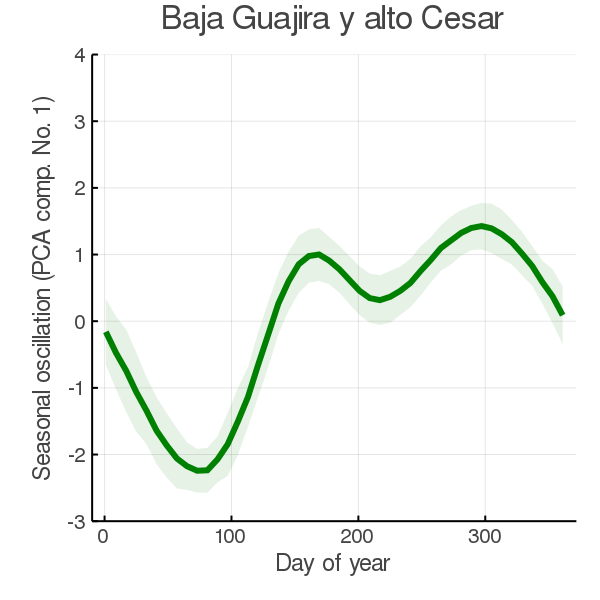

In [35]:
px = plot(tax, (smsc[:,buloc]*-1),
    color="green", legend=false,
    ribbon=sdbybiome[buloc,:], fillalpha=0.1,
    lw=3, xlabel="Day of year", xtickfont=font(7),
    ylabel=varname, ytickfont=font(7), guidefont=font(8),
    title=titlen, titlefontsize=11, legendfontsize=7,
    size=(300,300), ylim=(ylim1,ylim2), dpi=200)

In [36]:
nameout2 = join(map(x -> isspace(titlen[x]) ? "" : titlen[x], 1:length(titlen)))

"BajaGuajirayaltoCesar"

In [37]:
# Initialize px5 and px28
px5, px28 = 0, 0

(0, 0)

## Looping figures

### Figures with dominant land cover names 

In [38]:
for buloc = 2:size(ratiosp.axes[1])[1]

    buid = Integer(mscbuax[buloc])

#   Select the two most dominant land cover classes
    # Find  the row loction in lcbybu for selected by biotic unit "buidx"
    lcall = findall(row->row==buid, lcbybu2[:,1])
    # Filter land covers for the selected biotic unit
    lcsub = hcat(lcbybu2[lcall,2:end]' |> Matrix, lcbybu[1,2:end])
    # Sort land cover classes ascendingly including missings
    lcmis = sortslices(lcsub, dims=1, rev=true)
    # Exclude land cover classes with missing values
    idmis = findmax(findall(x->ismissing(x), lcmis[:,1]))[1]
    lcmax = lcmis[idmis+1:end,:]

      titlex = string(dictlc2[lcmax[1,2]], " (", round(lcmax[1,1], digits=2), "%)
  & ", dictlc2[lcmax[2,2]], " (", round(lcmax[2,1], digits=2), "%)")

      coordout = string(titlex)
    
      titlen = dict[buid]

#   Smoothing function
     smsc = mapslices(smoothMSC, meanbybiome, dims="Category2",ns=3)

     px = plot(tax, meanbybiome[buloc,:].*-1, color="orange",
         lw=1.5, fillalpha=0.1, legend=:false)

#   Add values of the ratio and fraction to the plot
    annotate!([
            #(180,-4.3,text(titlen,7,:center,:gray)), # -> activate to add biotic units name on the bottom 
           (300,3.2,text(string("\nRatio  = " , round(ratiosp[buloc], digits=2),
            "\nFraction = ", round(percannsem[buloc], digits=2)),9))])

    plot!(tax, (smsc[:,buloc]*-1),
    color="green", legend=false,
    ribbon=sdbybiome[buloc,:], fillalpha=0.1,
    lw=3, xlabel="Day of year", xtickfont=font(7),
    ylabel=varname, ytickfont=font(7), guidefont=font(8),
    title=coordout, titlefontsize = 11, legendfontsize = 7,
    size=(300,300), ylim=(ylim1,ylim2), dpi=200)
    
#   Delete blank spaces from biotic units names
    nameout2 = join(map(x -> isspace(titlen[x]) ? "" : titlen[x], 1:length(titlen)))

#     savefig(px, string(pathoutts, nameout, "_bu_", buid, "_", nameout2, ".png"))


#   Save two examples for demostrative purpose    
#     buid == 28 ? px28=px : buid == 5 ? px5=px : print(0) 
    if buid == 5
        px5=px
        println("example ", buid)
    elseif buid == 28
        px28=px
        println("example ", buid)
    end


end

example 5
example 28


In [39]:
titlen = dict[buid]

"San Andres y Providencia"

In [40]:
buid, nameout2

(67, "SanAndresyProvidencia")

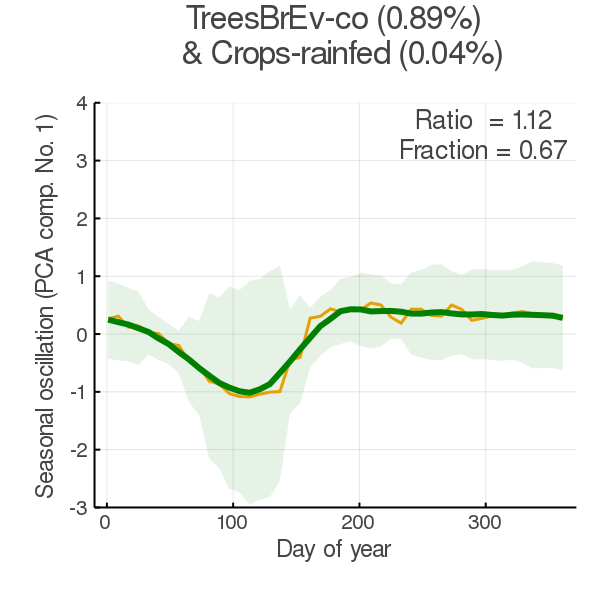

In [41]:
px

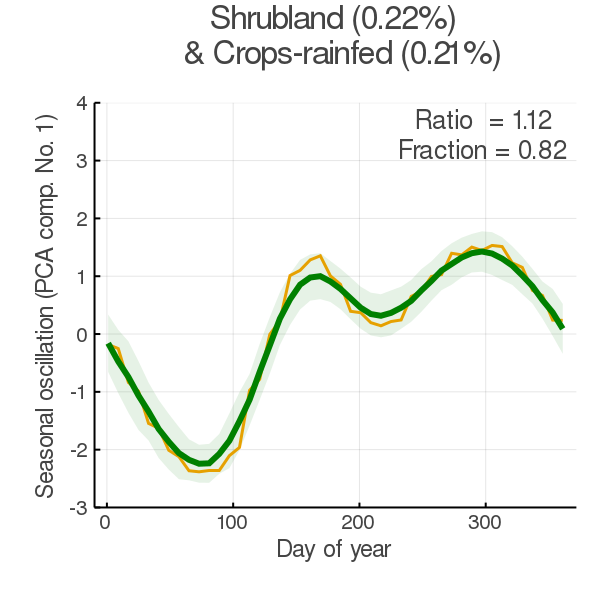

In [42]:
px5

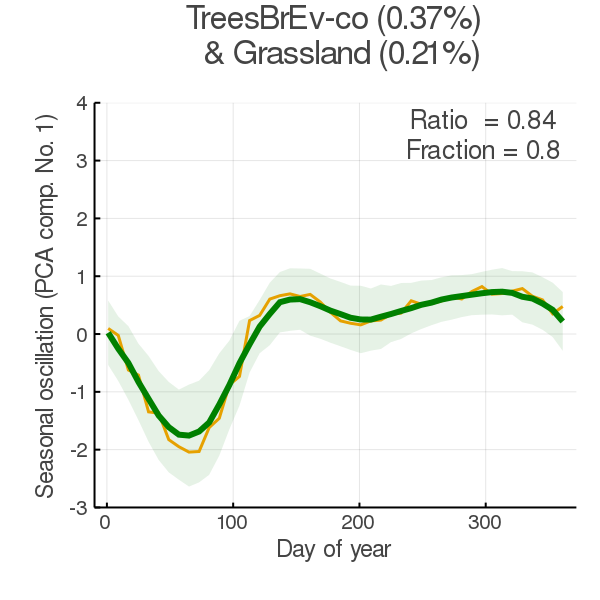

In [43]:
px28